In [5]:
# Imports
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Načtení dat o fyzické aktivitě

In [82]:
heart_rate_data_file = "data/fitbit_data/2022_02_06_all_time_export/Physical Activity/heart_rate-2022-01-29.json"
with open(heart_rate_data_file, "r") as f:
    j = json.load(f)

heart_rate_df = pd.json_normalize(j)
heart_rate_df.rename(columns = {"value.bpm": "bpm", "value.confidence": "confidence"}, inplace = True)
heart_rate_df["dateTime"] = pd.to_datetime(heart_rate_df["dateTime"], infer_datetime_format=True)

print(heart_rate_df.head(), end="\n\n")
print(heart_rate_df.info())

             dateTime  bpm  confidence
0 2022-01-28 23:00:01   71           2
1 2022-01-28 23:00:06   70           2
2 2022-01-28 23:00:11   72           2
3 2022-01-28 23:00:16   68           2
4 2022-01-28 23:00:21   67           2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10724 entries, 0 to 10723
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dateTime    10724 non-null  datetime64[ns]
 1   bpm         10724 non-null  int64         
 2   confidence  10724 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 251.5 KB
None


In [12]:
def read_fitbit_json_export(export_file, export_type):
    with open(export_file, "r") as f:
        j = json.load(f)
    df_read = pd.json_normalize(j)
    if export_type == "heart":
        df_read.rename(columns = {"value.bpm": "bpm"}, inplace=True)
        df_read.drop("value.confidence", axis=1, inplace=True)
    elif export_type == "calories":
        df_read.rename(columns = {"value": "calories"}, inplace=True)
        df_read["calories"] = df_read["calories"].astype(float)
    elif export_type == "distance":
        df_read.rename(columns = {"value": "distance"}, inplace=True)
        df_read["distance"] = df_read["distance"].astype(int)
        # Convert from centimeters to meters
        df_read["distance"] = df_read["distance"] / 100
    else:
        raise Exception("Export type not recognized")
    df_read["dateTime"] = pd.to_datetime(df_read["dateTime"], infer_datetime_format=True)
    return df_read

fitbit_data = "data/fitbit_data/2022_04_25_all_time_export/Physical Activity/"
heart_rate_exports = [os.path.join(fitbit_data, export) for export in os.listdir(fitbit_data) if "heart_rate-" in export and not "resting" in export]

df_fitbit = read_fitbit_json_export(heart_rate_exports[0], "heart")
for export in heart_rate_exports[1:]:
    df_fitbit = pd.concat([df_fitbit, read_fitbit_json_export(export, "heart")])

print(df_fitbit.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1530625 entries, 0 to 9904
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype         
---  ------    --------------    -----         
 0   dateTime  1530625 non-null  datetime64[ns]
 1   bpm       1530625 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 35.0 MB
None


In [143]:
distance_file = "data/fitbit_data/2022_02_06_all_time_export/Physical Activity/distance-2022-01-27.json"
with open(distance_file, "r") as f:
    j = json.load(f)

distance_df = pd.json_normalize(j)
distance_df["dateTime"] = pd.to_datetime(distance_df["dateTime"], infer_datetime_format=True)
distance_df["value"] = distance_df["value"].astype(int)

# TODO: Figure out the distance unit in exports (most likely centimeters)
distance_df["value"] = distance_df["value"] / 100

print(distance_df.head(), end="\n\n")
print(distance_df.info())

             dateTime  value
0 2022-01-26 23:00:00    0.0
1 2022-01-26 23:03:00    0.0
2 2022-01-26 23:05:00    0.0
3 2022-01-26 23:06:00    0.0
4 2022-01-26 23:07:00    0.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8376 entries, 0 to 8375
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   dateTime  8376 non-null   datetime64[ns]
 1   value     8376 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 131.0 KB
None


In [8]:
calories_file = "data/fitbit_data/2022_02_06_all_time_export/Physical Activity/calories-2022-01-27.json"
with open(calories_file, "r") as f:
    j = json.load(f)

calories_df = pd.json_normalize(j)
calories_df["dateTime"] = pd.to_datetime(calories_df["dateTime"], infer_datetime_format=True)
calories_df["value"] = calories_df["value"].astype(float)

print(calories_df.head(), end="\n\n")
print(calories_df.info())

             dateTime  value
0 2022-01-27 00:00:00   1.18
1 2022-01-27 00:01:00   1.08
2 2022-01-27 00:02:00   1.08
3 2022-01-27 00:03:00   1.18
4 2022-01-27 00:04:00   1.08

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15407 entries, 0 to 15406
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   dateTime  15407 non-null  datetime64[ns]
 1   value     15407 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 240.9 KB
None


## Vizualizace

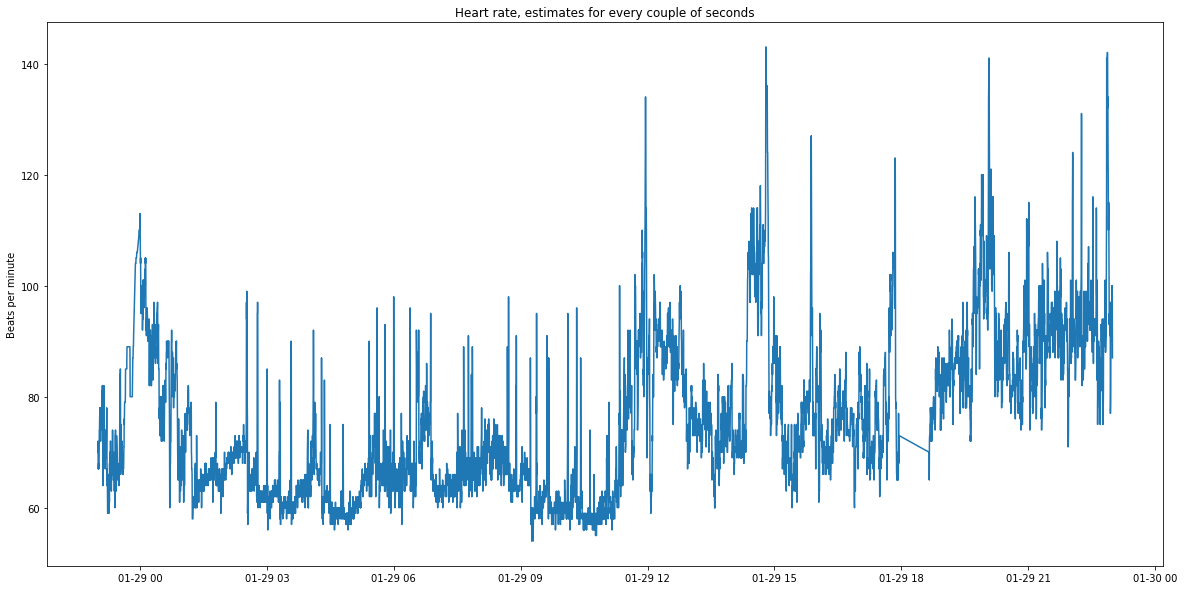

In [144]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()
ax.plot(heart_rate_df["dateTime"], heart_rate_df["bpm"])
ax.set_ylabel("Beats per minute")
ax.set_title("Heart rate, estimates for every couple of seconds");

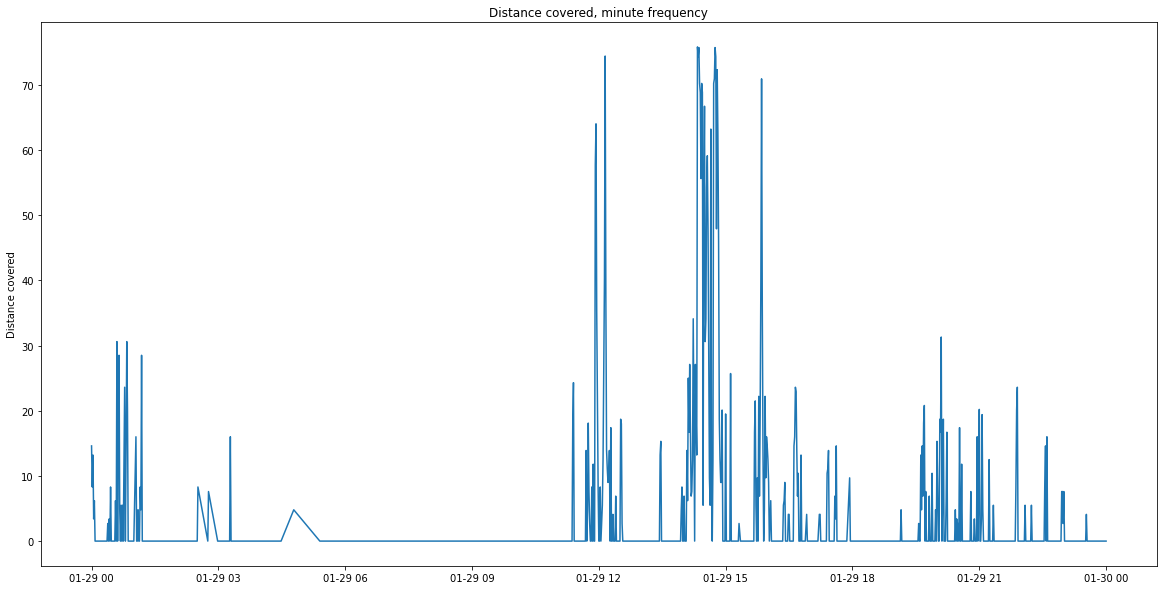

In [147]:
sub_period_df = distance_df[(distance_df["dateTime"] <= pd.to_datetime("2022/01/30 00:00")) &
                            (distance_df["dateTime"] >= pd.to_datetime("2022/01/29 00:00"))]
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()
ax.plot(sub_period_df["dateTime"], sub_period_df["value"])
ax.set_ylabel("Distance covered")
ax.set_title("Distance covered, minute frequency");

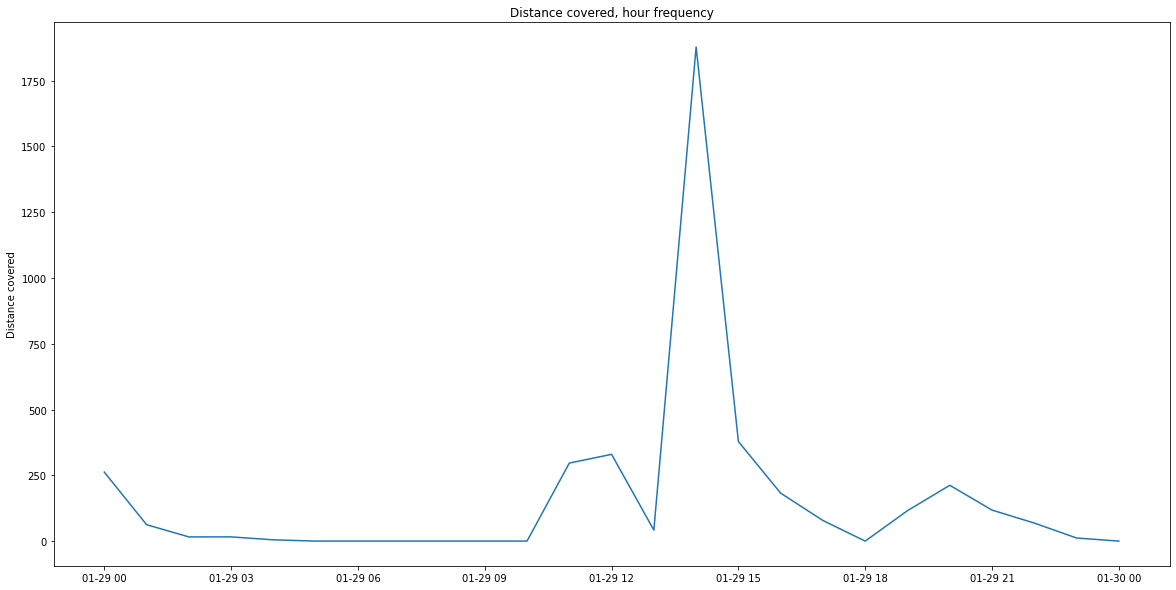

In [148]:
sub_period_hourly = sub_period_df.resample('H', on='dateTime').value.sum()
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()
ax.plot(sub_period_hourly)
ax.set_ylabel("Distance covered")
ax.set_title("Distance covered, hour frequency");

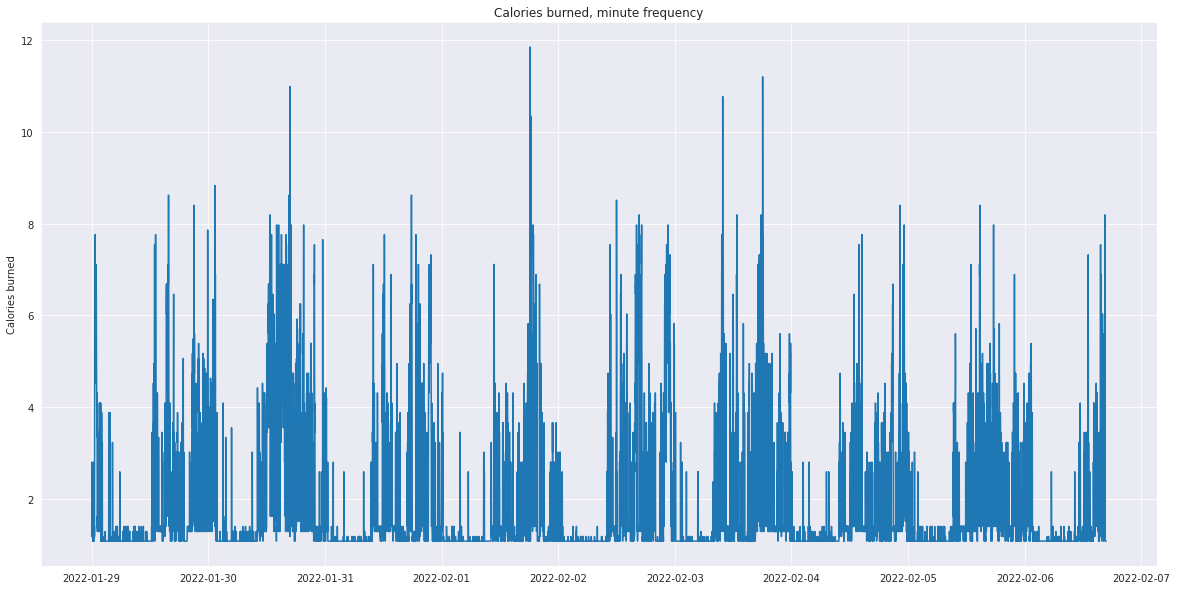

In [13]:
sub_period_df = calories_df[(calories_df["dateTime"] <= pd.to_datetime("2022/02/15 00:00")) &
                            (calories_df["dateTime"] >= pd.to_datetime("2022/01/29 00:00"))]
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()
ax.plot(sub_period_df["dateTime"], sub_period_df["value"])
ax.set_ylabel("Calories burned")
ax.set_title("Calories burned, minute frequency");

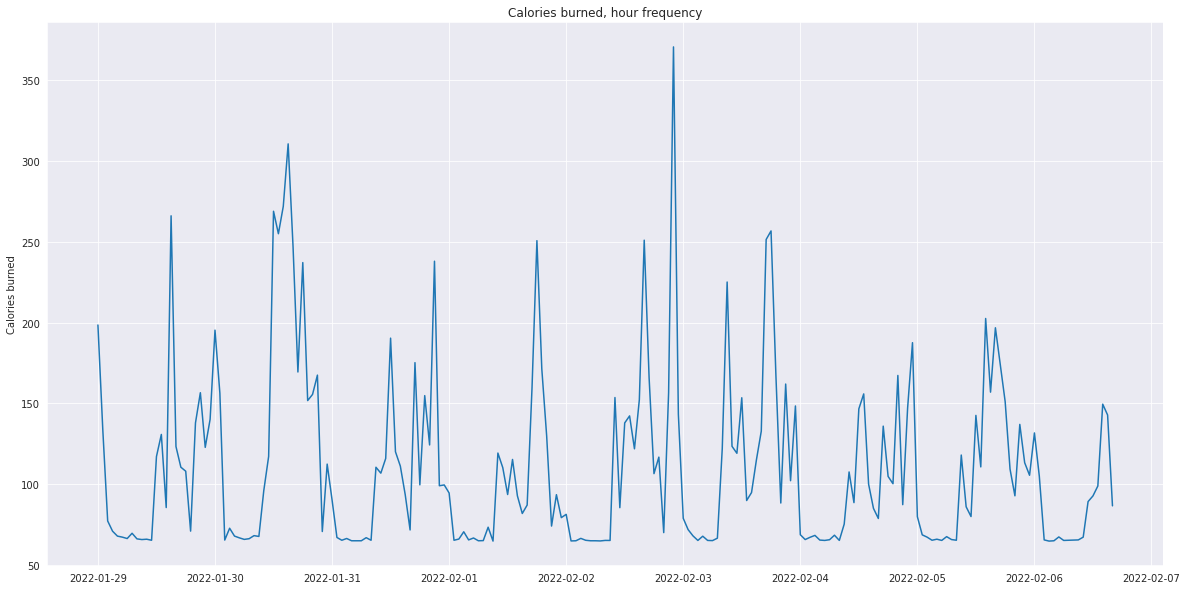

In [14]:
sub_period_hourly = sub_period_df.resample('H', on='dateTime').value.sum()
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()
ax.plot(sub_period_hourly)
ax.set_ylabel("Calories burned")
ax.set_title("Calories burned, hour frequency");